In [197]:
path = '/home/marciobrener/Documentos/MachineLearning/arquivos_csv/'

In [198]:
path_candatos = '/home/marciobrener/Documentos/MachineLearning/arquivos_csv/consulta_cand_2022/'

In [199]:
import numpy as np
import pandas as pd

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [202]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Regressão

In [203]:
df_estoque_DPF = pd.read_csv(path + 'EstoqueDPF.csv',sep=';')

In [204]:
df_estoque_DPF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149980 entries, 0 to 149979
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Titulo/Contrato                149980 non-null  object
 1   Vencimento do Titulo/Contrato  149980 non-null  object
 2   Valor do Estoque               149980 non-null  object
 3   Quantidade do Estoque          149980 non-null  object
 4   Mes do Estoque                 149980 non-null  object
 5   Classe da Carteira             149980 non-null  object
 6   Tipo de Divida                 149980 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


In [205]:
df_estoque_DPF.head()

,Titulo/Contrato,Vencimento do Titulo/Contrato,Valor do Estoque,Quantidade do Estoque,Mes do Estoque,Classe da Carteira,Tipo de Divida
0,TDAE120255,01/02/2024,"1079854,80","10680,00",06/2018,Mercado,Dívida Interna
1,TDAE120438,01/04/2022,"48253,02","482,00",06/2018,Mercado,Dívida Interna
2,TDAE980878,01/08/2018,"170144,00","1636,00",06/2018,Mercado,Dívida Interna
3,TDA24090300,01/09/2024,"17089,28","169,00",06/2018,Mercado,Dívida Interna
4,LFT 010323,01/03/2023,"134257731913,73","14044631,71",06/2018,Mercado,Dívida Interna


In [206]:
df_estoque_DPF.tail()

,Titulo/Contrato,Vencimento do Titulo/Contrato,Valor do Estoque,Quantidade do Estoque,Mes do Estoque,Classe da Carteira,Tipo de Divida
149975,TDAD12D231,01/04/2020,"1947136,66","19313,00",12/2018,Mercado,Dívida Interna
149976,Global 2045,27/01/2045,"13789620000,00","3550000,00",12/2018,Mercado,Dívida Externa
149977,TDAD13F238,01/06/2028,"397343,62","3958,00",12/2018,Mercado,Dívida Interna
149978,TDAD13G237,01/07/2027,"32952,64","329,00",12/2018,Mercado,Dívida Interna
149979,TDAD12D233,01/04/2022,"1947522,92","19313,00",12/2018,Mercado,Dívida Interna


## Selecionando apenas valores númericos

In [207]:
colunas_numericas = ['Valor do Estoque', 'Quantidade do Estoque']
for coluna in colunas_numericas:
    df_estoque_DPF[coluna] = pd.to_numeric(df_estoque_DPF[coluna].str.replace(',', '.'), errors='coerce')


In [208]:
df_numerico = df_estoque_DPF.select_dtypes(include=['float64', 'int64'])

# Correção 

In [209]:
correlacao = df_numerico.corr()
print(correlacao)

                       Valor do Estoque  Quantidade do Estoque
Valor do Estoque               1.000000               0.367146
Quantidade do Estoque          0.367146               1.000000


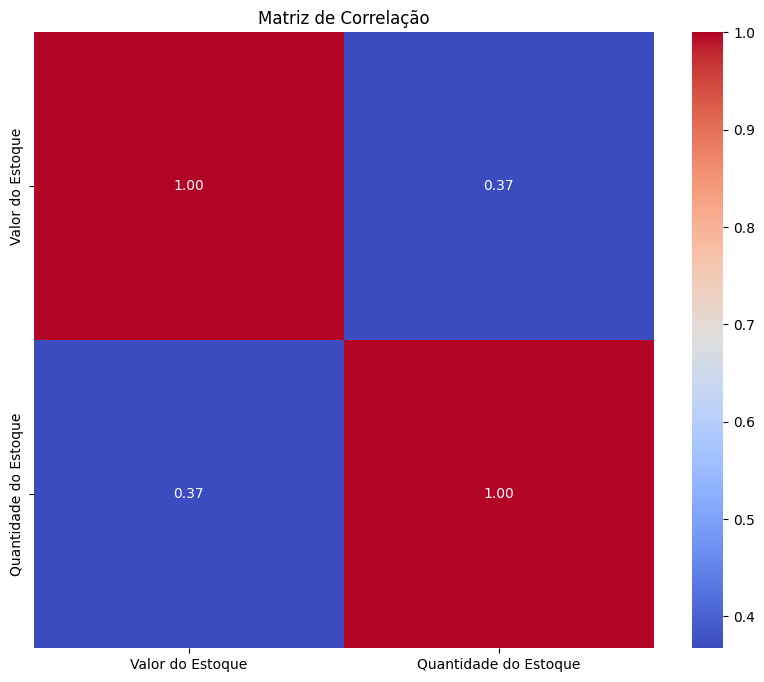

In [210]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [211]:
modelos_de_regressao = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state = 0),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state = 0)
}

In [212]:
resultados_rg = {
    'Modelo': [],
    'Score': []
}

In [213]:
X_estoque = df_estoque_DPF.drop(['Titulo/Contrato','Vencimento do Titulo/Contrato','Mes do Estoque','Classe da Carteira','Tipo de Divida'],axis =1 )
Y_estoque = df_estoque_DPF['Quantidade do Estoque']
X_estoque.shape, Y_estoque.shape

((149980, 2), (149980,))

In [214]:
X_train_estoque,X_test_estoque, Y_train_estoque,Y_test_estoque = train_test_split(
    X_estoque,Y_estoque,
    test_size = 0.30,
    random_state = 0
)

In [215]:
for nome_modelo, modelo in  modelos_de_regressao.items():
    modelo.fit(X_train_estoque,Y_train_estoque)
    y_preds_regression = modelo.predict(X_test_estoque)
    mse_regression = mean_squared_error(Y_test_estoque,y_preds_regression)
    r2_score_regression = r2_score(Y_test_estoque,y_preds_regression)
    resultados_rg['Modelo'].append(nome_modelo)
    resultados_rg['Score'].append(r2_score_regression)

    print(f'\n==== {nome_modelo} =====')
    print('MSE: ', mse_regression)
    print('r2_score: ', r2_score_regression)
    print('-' * 80)


==== Linear Regression =====
MSE:  1.053750286627457e-16
r2_score:  1.0
--------------------------------------------------------------------------------

==== Random Forest Regressor =====
MSE:  1414041865264.1345
r2_score:  0.9976825132960679
--------------------------------------------------------------------------------

==== Decision Tree Regressor =====
MSE:  1115020448016.8386
r2_score:  0.9981725823496685
--------------------------------------------------------------------------------


# Classificação

In [216]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [217]:
modelos_nb = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "RandomForestClassifier":RandomForestClassifier(n_estimators=1500, random_state=0),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5)
}

In [218]:
candidatura_2022= pd.read_csv(path_candatos + 'consulta_cand_2022_BRASIL.csv',encoding='latin-1',sep=';')

In [219]:
candidatura_2022['SG_PARTIDO']

0        CIDADANIA
1             PROS
2             PROS
3              PDT
4              PSC
           ...    
29309         PSDB
29310          PDT
29311         REDE
29312         PODE
29313          PDT
Name: SG_PARTIDO, Length: 29314, dtype: object

In [220]:
candidatura_2022['NM_PARTIDO']

0                                      CIDADANIA
1            PARTIDO REPUBLICANO DA ORDEM SOCIAL
2            PARTIDO REPUBLICANO DA ORDEM SOCIAL
3                PARTIDO DEMOCRÁTICO TRABALHISTA
4                         PARTIDO SOCIAL CRISTÃO
                          ...                   
29309    PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA
29310            PARTIDO DEMOCRÁTICO TRABALHISTA
29311                      REDE SUSTENTABILIDADE
29312                                    PODEMOS
29313            PARTIDO DEMOCRÁTICO TRABALHISTA
Name: NM_PARTIDO, Length: 29314, dtype: object

In [221]:
candidatura_2022['NR_PARTIDO']

0        23
1        90
2        90
3        12
4        20
         ..
29309    45
29310    12
29311    18
29312    19
29313    12
Name: NR_PARTIDO, Length: 29314, dtype: int64

In [222]:
labelenconder_sg = LabelEncoder()
labelenconder_nm = LabelEncoder()

candidatura_2022['SG_PARTIDO'] = labelenconder_sg.fit_transform(candidatura_2022['SG_PARTIDO'])
candidatura_2022['NM_PARTIDO'] = labelenconder_nm.fit_transform(candidatura_2022['NM_PARTIDO']) 


In [223]:
X_candidatura=candidatura_2022[['NR_PARTIDO','SG_PARTIDO']]
y_candidatura=candidatura_2022['NM_PARTIDO']


In [224]:
X_train_candidatura, X_test_candidatura, y_train_candidatura, y_test_candidatura = train_test_split(X_candidatura, y_candidatura,
                                                                                 test_size=0.3, shuffle=True,random_state=0)
X_train_candidatura.shape,X_test_candidatura.shape,y_train_candidatura.shape,y_test_candidatura.shape

((20519, 2), (8795, 2), (20519,), (8795,))

In [225]:
X_candidatura.describe()

,NR_PARTIDO,SG_PARTIDO
count,29314.000000,29314.000000
mean,33.950911,15.810261
std,21.438969,8.943285
min,10.000000,0.000000
25%,15.000000,10.000000
50%,28.000000,16.000000
75%,45.000000,24.000000
max,90.000000,31.000000


In [226]:
resultado_nb =  {
    'Modelo': [],
    'Acuracia': []
}

In [227]:
for nome_modelo, modelo in  modelos_nb.items():
    modelo.fit(X_train_candidatura, y_train_candidatura)
    y_preds_candidatura = modelo.predict(X_test_candidatura)
    acc = accuracy_score(y_test_candidatura, y_preds_candidatura)
    resultado_nb['Modelo'].append(nome_modelo)
    resultado_nb['Acuracia'].append(acc)


    print(f'\n==== {nome_modelo} =====')
    print(f'Acurácia: {acc:.4f}')
    print('Relatório de classificação')
    print(classification_report(y_test_candidatura, y_preds_candidatura, zero_division=0))
    print('Matriz de confusão')
    print(confusion_matrix(y_test_candidatura,y_preds_candidatura))
    print('-' * 80)



==== DecisionTreeClassifier =====
Acurácia: 1.0000
Relatório de classificação
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       320
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00       236
           4       1.00      1.00      1.00       419
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00       235
           9       1.00      1.00      1.00       236
          10       1.00      1.00      1.00       289
          11       1.00      1.00      1.00       376
          12       1.00      1.00      1.00       329
          13       1.00      1.00      1.00       483
          14       1.00      1.00      1.00       162
          15       1.00      1.00      1.00       273
  

In [228]:
df_resultados_gerais = pd.DataFrame(resultado_nb)

/tmp/ipykernel_29177/1869525298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


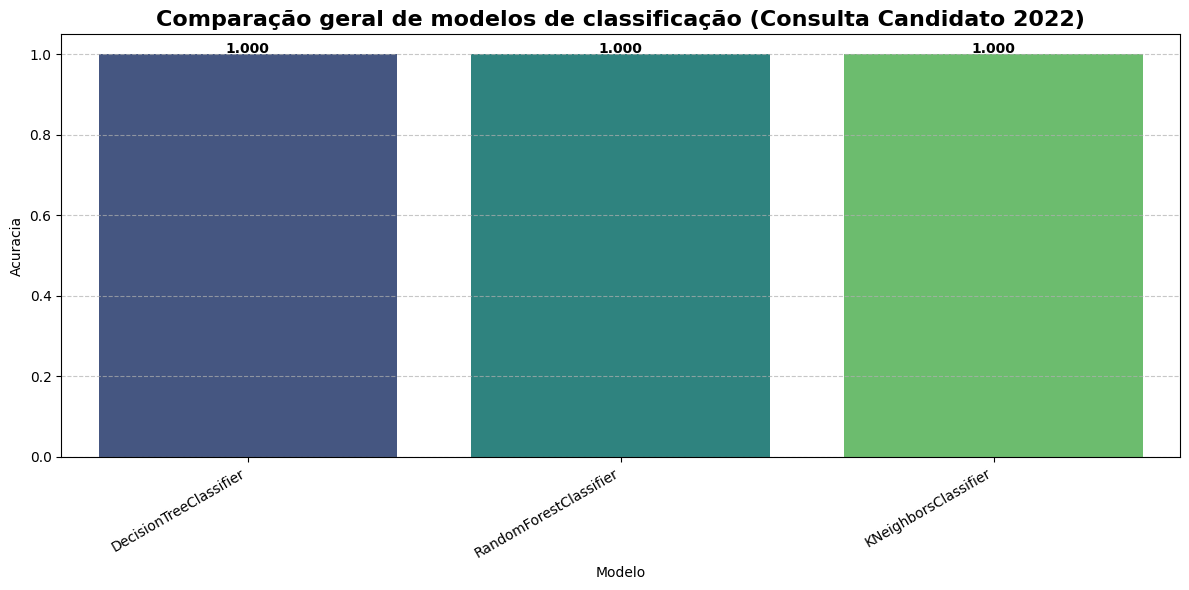

In [229]:
plt.figure(figsize=(12, 6))
sns.barplot(
        data=df_resultados_gerais,
        x='Modelo',
        y='Acuracia',
        palette='viridis'
)

plt.title('Comparação geral de modelos de classificação (Consulta Candidato 2022)', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=10)


for i, v in enumerate(df_resultados_gerais['Acuracia']):
        plt.text(i, v + 0.003, f'{v:.3f}', ha='center', fontsize=10, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()